In [1]:
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set(color_codes=True)
pal = sns.color_palette("viridis", 10)
sns.set_palette('muted')

导入数据

In [2]:
# 导入数据

date = pd.read_excel("time-hours.xlsx")
date

,Time,index_A,index_B,index_C,index_D,Temperature_of_system1,Temperature_of_system2,Mineral_parameter1,Mineral_parameter2,Mineral_parameter3,Mineral_parameter4
0,2022-01-13 00:50:00,78.26,25.54,12.24,14.14,1172.921864,813.665593,49.24,90.38,46.13,28.16
1,2022-01-13 01:50:00,78.16,25.27,12.24,14.32,1095.891333,802.501333,49.24,90.38,46.13,28.16
2,2022-01-13 02:50:00,78.15,26.21,12.93,14.59,854.920667,767.747500,49.24,90.38,46.13,28.16
3,2022-01-13 03:50:00,78.39,25.22,12.93,14.28,854.837500,767.735333,49.24,90.38,46.13,28.16
4,2022-01-13 04:50:00,79.22,24.60,12.41,13.70,843.975500,763.982667,49.24,90.38,46.13,28.16
...,...,...,...,...,...,...,...,...,...,...,...
233,2022-01-22 19:50:00,79.76,22.00,11.72,18.84,1404.859000,931.219167,54.74,93.05,49.03,21.48
234,2022-01-22 20:49:00,80.51,22.00,11.37,18.53,1404.868000,931.252167,54.74,93.05,49.03,21.48
235,2022-01-22 21:50:00,80.16,21.78,10.85,17.90,1404.843167,931.226500,54.74,93.05,49.03,21.48
236,2022-01-22 22:50:00,79.79,22.58,11.20,17.05,1404.845000,931.167833,54.74,93.05,49.03,21.48


In [3]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Time                    238 non-null    datetime64[ns]
 1   index_A                 238 non-null    float64       
 2   index_B                 238 non-null    float64       
 3   index_C                 238 non-null    float64       
 4   index_D                 238 non-null    float64       
 5   Temperature_of_system1  238 non-null    float64       
 6   Temperature_of_system2  238 non-null    float64       
 7   Mineral_parameter1      238 non-null    float64       
 8   Mineral_parameter2      238 non-null    float64       
 9   Mineral_parameter3      238 non-null    float64       
 10  Mineral_parameter4      238 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 20.6 KB


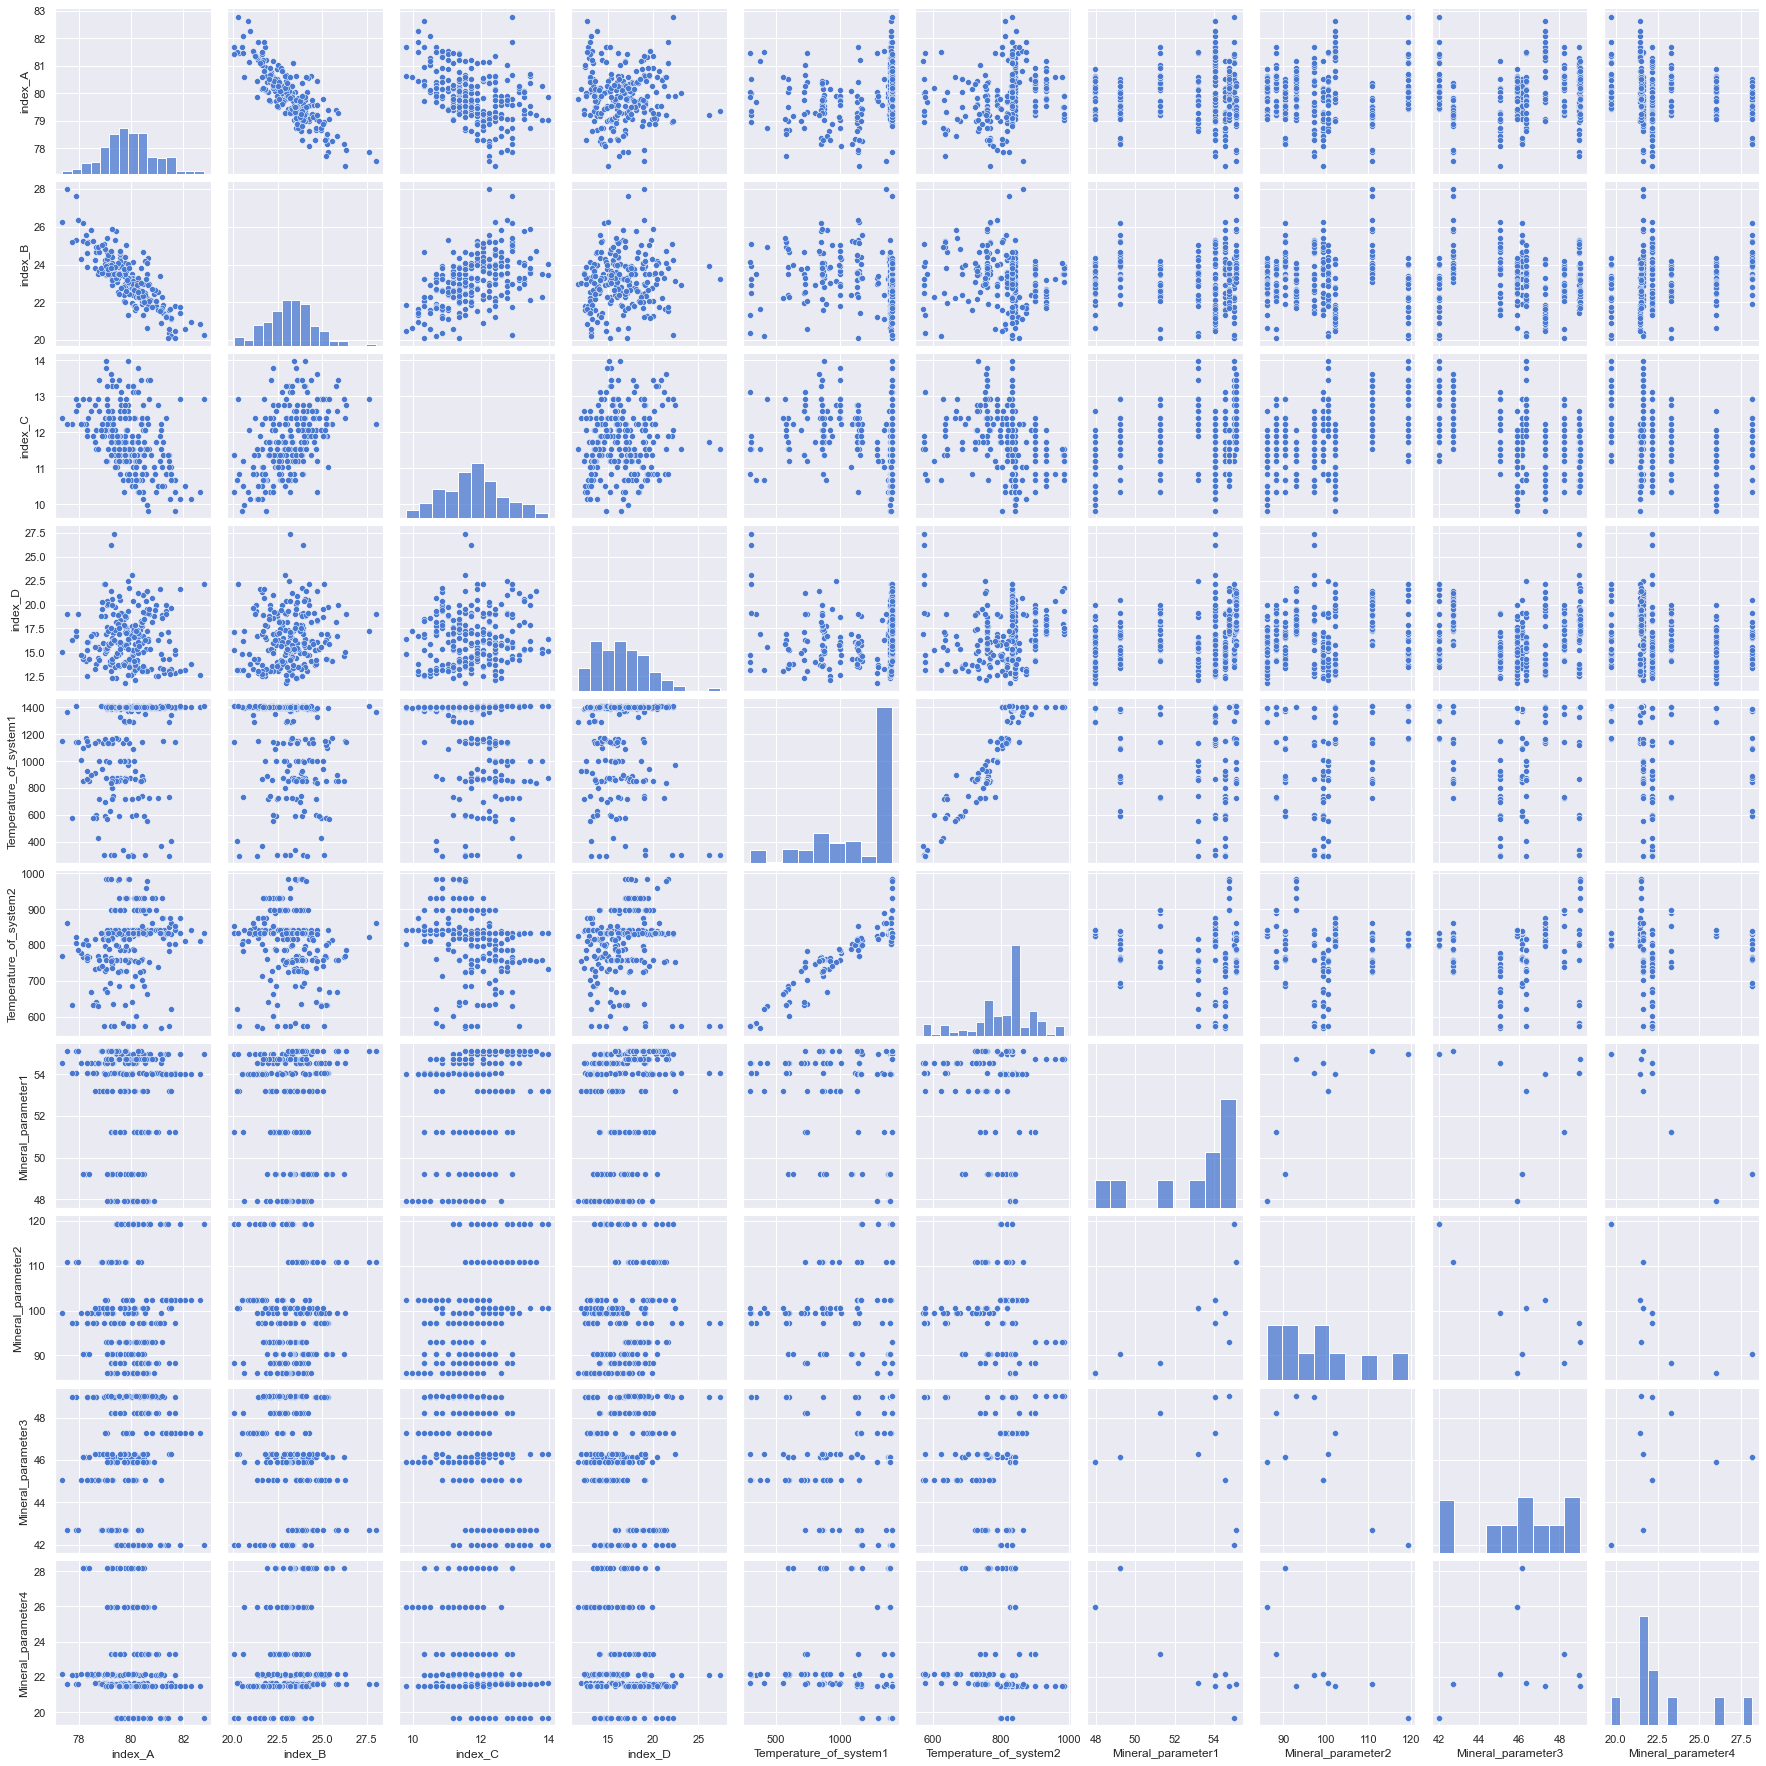

In [4]:
sns.pairplot(date)

In [5]:
name = ["index_A","index_B","index_C","index_D","Temperature_of_system1",	"Temperature_of_system2",	"Mineral_parameter1",	"Mineral_parameter2",	"Mineral_parameter3",	"Mineral_parameter4"]
# sns.heatmap(name)
date[name]

,index_A,index_B,index_C,index_D,Temperature_of_system1,Temperature_of_system2,Mineral_parameter1,Mineral_parameter2,Mineral_parameter3,Mineral_parameter4
0,78.26,25.54,12.24,14.14,1172.921864,813.665593,49.24,90.38,46.13,28.16
1,78.16,25.27,12.24,14.32,1095.891333,802.501333,49.24,90.38,46.13,28.16
2,78.15,26.21,12.93,14.59,854.920667,767.747500,49.24,90.38,46.13,28.16
3,78.39,25.22,12.93,14.28,854.837500,767.735333,49.24,90.38,46.13,28.16
4,79.22,24.60,12.41,13.70,843.975500,763.982667,49.24,90.38,46.13,28.16
...,...,...,...,...,...,...,...,...,...,...
233,79.76,22.00,11.72,18.84,1404.859000,931.219167,54.74,93.05,49.03,21.48
234,80.51,22.00,11.37,18.53,1404.868000,931.252167,54.74,93.05,49.03,21.48
235,80.16,21.78,10.85,17.90,1404.843167,931.226500,54.74,93.05,49.03,21.48
236,79.79,22.58,11.20,17.05,1404.845000,931.167833,54.74,93.05,49.03,21.48


<AxesSubplot:>

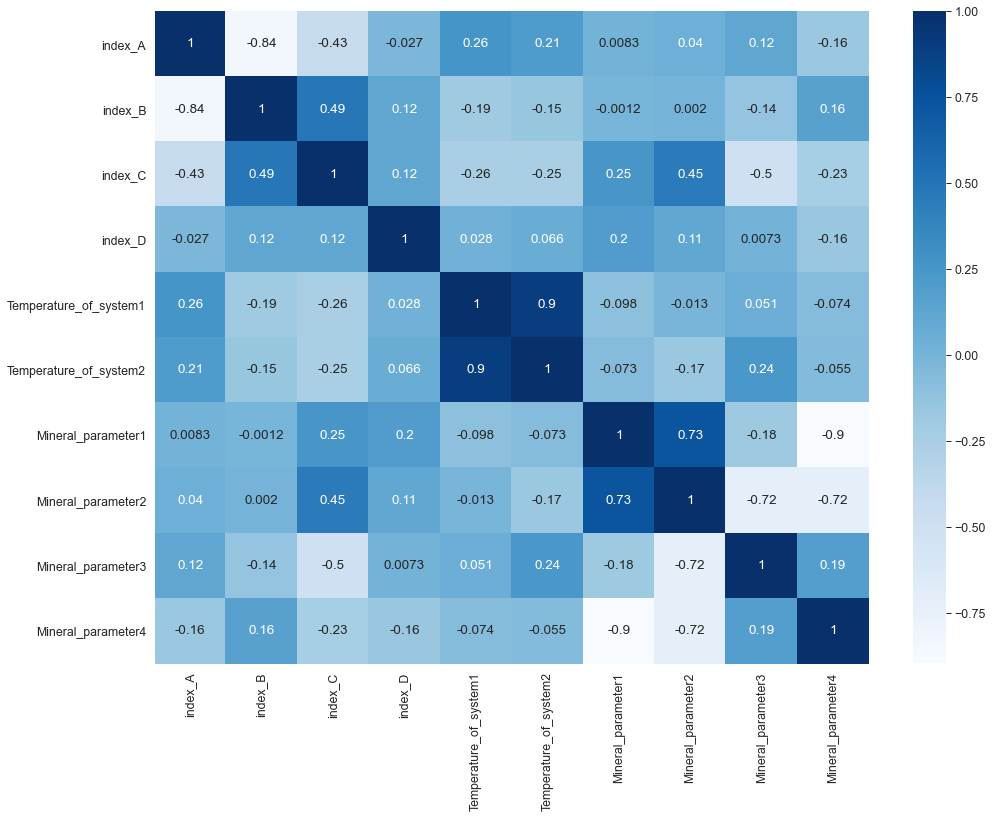

In [6]:
import numpy as np
df = pd.DataFrame(date)
corr = df.corr()
plt.figure(figsize=(16,12))
sns.set_context('paper',font_scale=1.4)
sns.heatmap(corr, cmap='Blues', annot=True)

```
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Generate dataset
X, y = make_regression(n_samples=25000, n_features=3, n_targets=2, random_state=33)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=33)

# Create the SVR regressor
svr = SVR(epsilon=0.2)

# Create the Multioutput Regressor
mor = MultiOutputRegressor(svr)

# Train the regressor
mor = mor.fit(X_train, y_train)

# Generate predictions for testing data
y_pred = mor.predict(X_test)

# Evaluate the regressor
mse_one = mean_squared_error(y_test[:,0], y_pred[:,0])
mse_two = mean_squared_error(y_test[:,1], y_pred[:,1])
print(f'MSE for first regressor: {mse_one} - second regressor: {mse_two}')
mae_one = mean_absolute_error(y_test[:,0], y_pred[:,0])
mae_two = mean_absolute_error(y_test[:,1], y_pred[:,1])
print(f'MAE for first regressor: {mae_one} - second regressor: {mae_two}')
```


In [7]:
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import explained_variance_score,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_percentage_error

import xgboost  as xgb

# Generate dataset
# X, y = make_regression(n_samples=25000, n_features=3, n_targets=2, random_state=33)
# name_X = ["Temperature_of_system1",	"Temperature_of_system2",	"Mineral_parameter1",	"Mineral_parameter2",	"Mineral_parameter3",	"Mineral_parameter4"]
# name_y = ["index_A","index_B","index_C","index_D"]
name_X = ["index_A","index_B","index_C","index_D",	"Mineral_parameter1",	"Mineral_parameter2",	"Mineral_parameter3",	"Mineral_parameter4"]
name_y = ["Temperature_of_system1",	"Temperature_of_system2"]
name = ["index_A","index_B","index_C","index_D","Temperature_of_system1",	"Temperature_of_system2",	"Mineral_parameter1",	"Mineral_parameter2",	"Mineral_parameter3",	"Mineral_parameter4"]
X = date[name_X]
y = date[name_y]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=33)

# Create the SVR regressor
# svr = SVR(epsilon=0.01,C=1.0,kernel='poly')
# svr = SVR(epsilon=0.2,kernel='rbf')
svr = RandomForestRegressor(max_depth=2, random_state=0)
# svr = ExtraTreesRegressor(n_estimators=100, random_state=0)
# other_params = {'learning_rate': 0.1, 'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0, 'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
# svr = xgb.XGBRegressor(objective='reg:squarederror',**other_params)

# params = {
#     'iterations':330,
#     'learning_rate':0.1,
#     'depth':10,
#     'loss_function':'RMSE'

# }


# svr = CatBoostRegressor(**params)


# Create the Multioutput Regressor
mor = MultiOutputRegressor(svr)

# Train the regressor
mor = mor.fit(X_train, y_train)

# Generate predictions for testing data
y_pred = mor.predict(X_test)

# Evaluate the regressor
y_test = y_test.values
# y_test
mse1 = mean_squared_error(y_test[:,0], y_pred[:,0])
mse2 = mean_squared_error(y_test[:,1], y_pred[:,1])
# mse3 = mean_squared_error(y_test[:,2], y_pred[:,2])
# mse4 = mean_squared_error(y_test[:,3], y_pred[:,3])
# print(f'MSE for first regressor: {mse_one} -second regressor: {mse_two}')
print("MSE:")
print("1  " + str(mse1))
print("2  " + str(mse2))
# print("3  " + str(mse3))
# print("4  " + str(mse4))

mse1 = mean_absolute_error(y_test[:,0], y_pred[:,0])
mse2 = mean_absolute_error(y_test[:,1], y_pred[:,1])
# mse3 = mean_absolute_error(y_test[:,2], y_pred[:,2])
# mse4 = mean_absolute_error(y_test[:,3], y_pred[:,3])
# print(f'MAE for first regressor: {mae_one} - second regressor: {mae_two}')
print("MAE:")
print("1  " + str(mse1))
print("2  " + str(mse2))
# print("3  " + str(mse3))
# print("4  " + str(mse4))

mse1 = explained_variance_score(y_test[:,0], y_pred[:,0])
mse2 = explained_variance_score(y_test[:,1], y_pred[:,1])
# mse3 = explained_variance_score(y_test[:,2], y_pred[:,2])
# mse4 = explained_variance_score(y_test[:,3], y_pred[:,3])
# print(f'MAE for first regressor: {mae_one} - second regressor: {mae_two}')
print("可解释的方差分数:")
print("1  " + str(mse1))
print("2  " + str(mse2))
# print("3  " + str(mse3))
# print("4  " + str(mse4))


mse1 = r2_score(y_test[:,0], y_pred[:,0])
mse2 = r2_score(y_test[:,1], y_pred[:,1])
# mse3 = r2_score(y_test[:,2], y_pred[:,2])
# mse4 = r2_score(y_test[:,3], y_pred[:,3])
# print(f'MAE for first regressor: {mae_one} - second regressor: {mae_two}')
print("r2_score:")
print("1  " + str(mse1))
print("2  " + str(mse2))
# print("3  " + str(mse3))
# print("4  " + str(mse4))

# mean_absolute_percentage_error
mse1 = mean_absolute_percentage_error(y_test[:,0], y_pred[:,0])
mse2 = mean_absolute_percentage_error(y_test[:,1], y_pred[:,1])
# mse3 = r2_score(y_test[:,2], y_pred[:,2])
# mse4 = r2_score(y_test[:,3], y_pred[:,3])
# print(f'MAE for first regressor: {mae_one} - second regressor: {mae_two}')
print("mean_absolute_percentage_error:")
print("1  " + str(mse1))
print("2  " + str(mse2))

MSE:
1  60867.46431286257
2  3882.980632427198
MAE:
1  173.4548819081132
2  44.36166101765326
可解释的方差分数:
1  0.48940290493772043
2  0.6484430476234295
r2_score:
1  0.4757266284752426
2  0.6411484387044437
mean_absolute_percentage_error:
1  0.2779198460748129
2  0.061375585279966526


In [8]:
pr = pd.read_excel("preid2.xlsx")
pr
pt_val = mor.predict(pr[name_X])
pt_val

array([[1351.81643632,  803.0780142 ],
       [1346.93489894,  803.0780142 ]])